In [1]:
from maskdata_utils import FaceMaskGenerator
from os.path import join, basename, dirname, exists
import keras
import tensorflow

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

config = tensorflow.ConfigProto( device_count = {'GPU': 1 , 'CPU': 16} ) 
config.gpu_options.allow_growth = True
sess = tensorflow.Session(config=config) 
keras.backend.set_session(sess)

Using TensorFlow backend.


In [2]:
encoder_path = 'mymodels/facemask/encoder.h5'
batch_size = 64

In [3]:
def embedgenerator(data, encoder):
    while True:
        x, y = next(data)
        result = encoder.predict(x.reshape(x.shape[0]*x.shape[1],x.shape[2],x.shape[3],x.shape[4]))
        result = result.reshape(x.shape[0], 7, 7, 128)
        yield result, y

# Prepare data
train_data = FaceMaskGenerator(batch_size, subset='train', rescale=True)

validation_data = FaceMaskGenerator(batch_size, subset='valid', rescale=True)

encoder = keras.models.load_model(encoder_path)

/home/yoyo/anaconda3/envs/dti_alpr/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
train_gen = embedgenerator(train_data, encoder)

In [5]:
embeds = []
ys = []

for i in range(10):
    x, y = next(train_gen)
    embeds.extend(x.mean(axis=(1,2)))
    ys.extend(y)

In [6]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array(embeds)
X_embedded = TSNE(n_components=2).fit_transform(X)
Y = np.argmax(ys,axis=1)

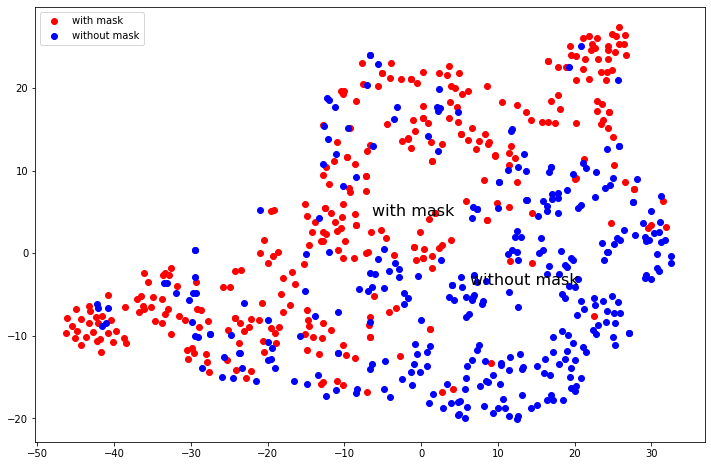

In [8]:
# Plot our dataset.
fig = plt.figure(figsize=(12, 8))
plt.scatter(X_embedded[Y==1,0], X_embedded[Y==1,1], c='red', label='with mask')
plt.scatter(X_embedded[Y==0,0], X_embedded[Y==0,1], c='blue', label='without mask')
plt.legend()

plt.text(X_embedded[Y==1,0].mean(), X_embedded[Y==1,1].mean(), 'with mask', fontsize=16)
plt.text(X_embedded[Y==0,0].mean(), X_embedded[Y==0,1].mean(), 'without mask', fontsize=16)

plt.show()